In [ ]:
# import libraries needed
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
# input data (Data Preparation)
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-07-26 05:20:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.80MB/s    in 50s     

2020-07-26 05:21:22 (6.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# extract data
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Data Cleaning
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'rock', 'scissors']

In [ ]:
# Data Preparation
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# splitting data for training and validation
!pip install split-folders
import split_folders
split_folders.ratio('/tmp/rockpaperscissors', output='/tmp/rockpaperscissors/rps-cv-images', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3135.53 files/s]


In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
num_rock_tr = len(os.listdir(train_rock))
num_paper_tr = len(os.listdir(train_paper))
num_scissors_tr = len(os.listdir(train_scissors))
num_rock_val = len(os.listdir(validation_rock))
num_paper_val = len(os.listdir(validation_paper))
num_scissors_val = len(os.listdir(validation_scissors))

In [ ]:
total_train = num_rock_tr + num_paper_tr + num_scissors_tr
total_validation = num_rock_val + num_paper_val + num_scissors_val

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE = 150

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode='nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      batch_size=BATCH_SIZE,
                      shuffle=True,
                      target_size=(IMG_SHAPE, IMG_SHAPE),
                      class_mode='categorical',
                      classes=['rock', 'paper', 'scissors'])
validation_generator = val_datagen.flow_from_directory(
                          validation_dir,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          target_size=(IMG_SHAPE, IMG_SHAPE),
                          class_mode='categorical',
                          classes=['rock', 'paper', 'scissors'])

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'rock': 0, 'paper': 1, 'scissors': 2}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten

Using TensorFlow backend.


In [ ]:
# Building CNN Model
l2_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), #RGB
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
l2_model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
l2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [ ]:
EPOCHS = 50

In [ ]:
import time
start_time = time.time()

In [ ]:
#training CNN model
history = l2_model.fit(
    train_generator,
    steps_per_epoch=np.floor(total_train / BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=validation_generator,  
    validation_steps=np.floor(total_validation / BATCH_SIZE))

Epoch 1/50
41/41 [==============================] - 18s 439ms/step - loss: 1.1367 - accuracy: 0.3460 - val_loss: 1.0976 - val_accuracy: 0.3426
Epoch 2/50
41/41 [==============================] - 18s 440ms/step - loss: 1.0793 - accuracy: 0.4116 - val_loss: 1.0477 - val_accuracy: 0.4248
Epoch 3/50
41/41 [==============================] - 18s 439ms/step - loss: 1.0703 - accuracy: 0.4345 - val_loss: 1.0683 - val_accuracy: 0.5116
Epoch 4/50
41/41 [==============================] - 18s 441ms/step - loss: 1.0138 - accuracy: 0.4855 - val_loss: 0.9948 - val_accuracy: 0.5949
Epoch 5/50
41/41 [==============================] - 18s 436ms/step - loss: 0.9272 - accuracy: 0.5800 - val_loss: 0.7690 - val_accuracy: 0.6875
Epoch 6/50
41/41 [==============================] - 18s 441ms/step - loss: 0.7647 - accuracy: 0.6662 - val_loss: 0.6246 - val_accuracy: 0.7488
Epoch 7/50
41/41 [==============================] - 18s 436ms/step - loss: 0.6689 - accuracy: 0.7111 - val_loss: 0.6566 - val_accuracy: 0.7442

In [ ]:
end_time = time.time()
selisih_waktu = (end_time - start_time)/60
print(selisih_waktu)

16.003522658348082


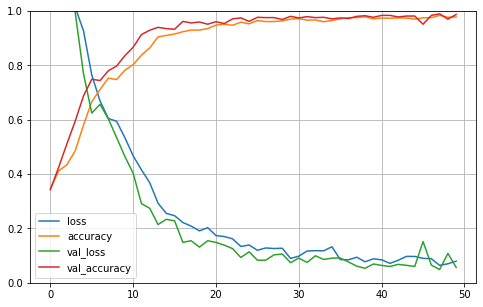

In [ ]:
# checking whether the data is overfitting or no
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Saving WhatsApp Image 2020-07-25 at 11.35.01(1).jpeg to WhatsApp Image 2020-07-25 at 11.35.01(1) (1).jpeg
WhatsApp Image 2020-07-25 at 11.35.01(1).jpeg
paper


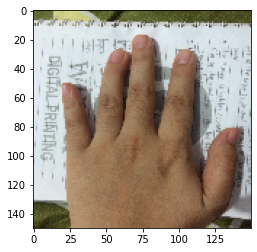

In [ ]:
# Look up for model result
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded =files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(IMG_SHAPE,IMG_SHAPE))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = l2_model.predict(images, batch_size=5)
  print(fn) 
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==0:
    print('rock')
  else:
    print('scissors')